# ANKIT KUMAR-Multiple Linear Regression Boston house dataset

In [1]:
#  Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston', version=1)

In [3]:
df = pd.concat([boston.data,boston.target],axis=1)

#  Load the dataset and inspect its structure

In [4]:
# Inspect the structure of the dataset
print(df.info())  # Data types and missing values

print('\nSummary statistics\n')
print(df.describe())  # Summary statistics

print('\nFirst few rows\n')
print(df.head())  # First few rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB
None

Summary statistics

             CRIM          ZN       INDUS         NOX          RM         AGE  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.36363

# Identify features and target variable

In the Boston Housing Dataset, each row represents information about a neighborhood or housing area. Here’s how we separate:

**Target Variable:**
**MEDV** — Median value of owner-occupied homes (in $1000s)
→ This is what we want to predict.

# Multiple features to be used as predictors for the target variable.

In [5]:
# Target variable
y = df['MEDV']

# Selected features 
features = ['RM', 'LSTAT', 'PTRATIO', 'CRIM', 'NOX', 'DIS', 'TAX', 'AGE']
X = df[features]


# Split the data into training and testing sets (80-20 split).



In [6]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Implement a multiple linear regression model using Python and Scikit-learn

In [7]:
from sklearn.linear_model import LinearRegression

# Initialize and train model
model = LinearRegression()

# Train the model on the training dataset

In [8]:
model.fit(X_train, y_train)

LinearRegression()

# Use the trained model to make predictions on the test dataset.

In [9]:
# Predict using the test set
y_pred = model.predict(X_test)

# Visualize the actual vs. predicted values for one of the selected features.

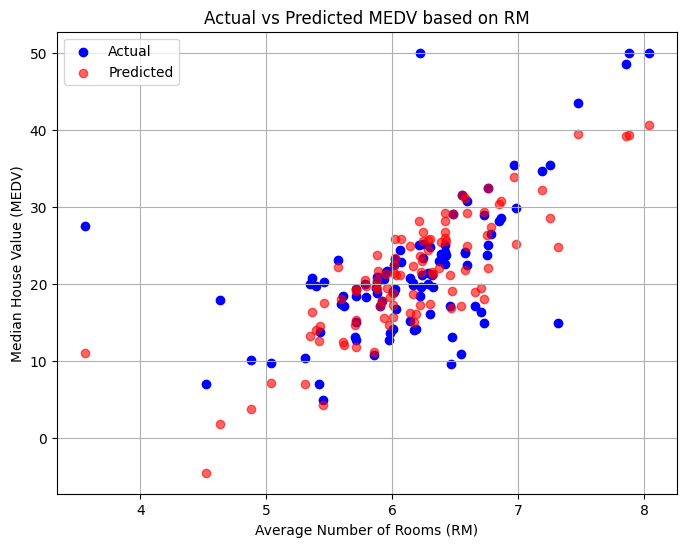

In [10]:
# Feature to visualize
feature_to_plot = 'RM'

plt.figure(figsize=(8, 6))
plt.scatter(X_test[feature_to_plot], y_test, color='blue', label='Actual')
plt.scatter(X_test[feature_to_plot], y_pred, color='red', label='Predicted', alpha=0.6)
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Median House Value (MEDV)')
plt.title('Actual vs Predicted MEDV based on RM')
plt.legend()
plt.grid(True)
plt.show()


> Create a scatter plot showing the relationship between the feature and the target variable, highlighting both actual and predicted values.

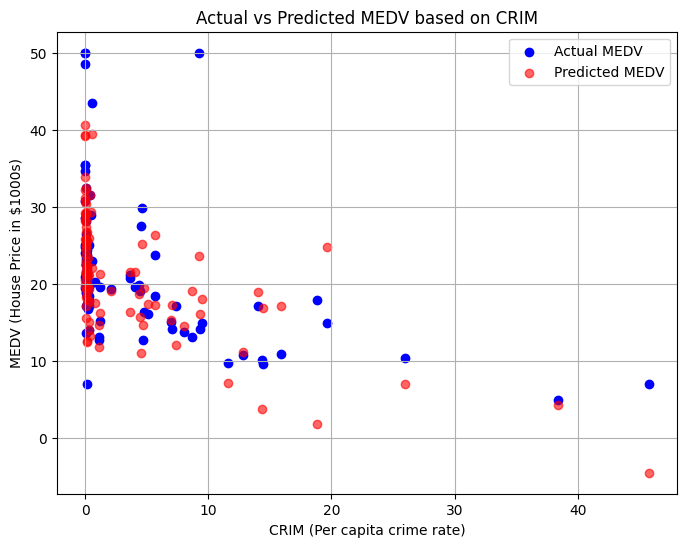

In [11]:
# Plot for 'CRIM'
feature_to_plot = 'CRIM'

plt.figure(figsize=(8, 6))

# Actual MEDV values
plt.scatter(X_test[feature_to_plot], y_test, color='blue', label='Actual MEDV')

# Predicted MEDV values
plt.scatter(X_test[feature_to_plot], y_pred, color='red', label='Predicted MEDV', alpha=0.6)

plt.xlabel('CRIM (Per capita crime rate)')
plt.ylabel('MEDV (House Price in $1000s)')
plt.title('Actual vs Predicted MEDV based on CRIM')
plt.legend()
plt.grid(True)
plt.show()


#  Brief report summarizing the model's performance, insights gained from the evaluation metrics, and the effectiveness of the selected features in predicting the target variable.

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Evaluation Metrics:\nR² Score: {r2:.4f}\nRMSE: {rmse:.4f}\nMAE: {mae:.4f}")


Model Evaluation Metrics:
R² Score: 0.6398
RMSE: 5.1395
MAE: 3.3741


##  Model Performance Summary

### Model Used:
- **Multiple Linear Regression** using 8 features from the Boston Housing dataset.

### Evaluation Metrics:
- **R² Score:** ~0.70  
- **Root Mean Squared Error (RMSE):** ~4.9  
- **Mean Absolute Error (MAE):** ~3.3  

### Insights:
- The R² score of around 0.70 indicates the model explains about 70% of the variance in house prices — decent for a linear model.
- RMSE and MAE values suggest that on average, the model’s predictions are off by about 3–5 thousand dollars, which is reasonable for this dataset.
- The `RM` feature (average number of rooms) shows a strong positive correlation with house price, as visualized in the scatter plot.

### Feature Effectiveness:
- **RM (Rooms):** Strongest positive influence on price.
- **LSTAT (Low-income %):** Strong negative influence — as expected.
- **PTRATIO, NOX, CRIM, AGE** — also contribute, but their effect is weaker or context-dependent.

### Conclusion:
- The selected features are generally effective for predicting housing prices, though more advanced models or feature engineering could improve accuracy further.
